In [1]:
import math
import os
import matplotlib.pyplot as plt

files = ['norm_wiki_en.txt',
            'norm_wiki_eo.txt',
            'norm_wiki_et.txt',
            'norm_wiki_ht.txt',
            'norm_wiki_la.txt',
            'norm_wiki_nv.txt',
            'norm_wiki_so.txt']
            
samples = [
            'sample0.txt',
            'sample1.txt',
            'sample2.txt',
            'sample3.txt',
            'sample4.txt',
            'sample5.txt']

In [2]:
def normalizeProbabilites(dict):
    factor = 0
    normalizedDict = {}
    for i in dict.values():
        factor += i

    for k, v in dict.items():
        normalizedDict[k] = v/factor

    return normalizedDict
    
def probChars(text, rank):
    probabilities = {}
    for i in range(len(text) - rank):
        sample = text[i:i+rank+1]
        if sample in probabilities:
            probabilities[sample] += 1
        else:
            probabilities[sample] = 1

    probabilities = normalizeProbabilites(probabilities)
    return probabilities

def probWords(text, rank):
    text = text.split()
    probabilities = {}
    for i in range(len(text) - rank):
        sample = ' '.join(text[i:i+rank+1])
        if sample in probabilities:
            probabilities[sample] += 1
        else:
            probabilities[sample] = 1

    probabilities = normalizeProbabilites(probabilities)
    return probabilities

def conditionalEntropy(text, rank = 0, mode = 0):
    #0 is for characters, 1 is for words
    if rank == 0:
        entropy = 0
        match mode:
            case 0:
                probabilities = probChars(text, rank)
            case 1: 
                probabilities = probWords(text, rank)
        for p in probabilities.values():
            entropy += p*math.log2(1/p)
        return entropy

    else:
        condEntropy = 0
        match mode:
            case 0:
                probabilities = probChars(text, rank)
                condProbabilities = probChars(text, rank - 1)
                for p in probabilities:
                    condEntropy += probabilities[p]*math.log2(1/(probabilities[p]/condProbabilities[p[:rank]]))
            case 1: 
                probabilities = probWords(text, rank)
                condProbabilities = probWords(text, rank - 1)
                for p in probabilities:
                    condEntropy += probabilities[p]*math.log2(1/(probabilities[p]/condProbabilities[' '.join(p.split()[:-1])]))
        return condEntropy
    


In [3]:
text = open(files[4], 'r').read().replace('\n', ' ').strip()
print("File: ", files[4], '| LATIN')
for rank in range(10):
    entropyChars = conditionalEntropy(text, rank, 0)
    entropyWords = conditionalEntropy(text, rank, 1)
    print('rank:', rank, "| Letter entropy: ", entropyChars," Word entropy: ", entropyWords)

File:  norm_wiki_la.txt | LATIN
rank: 0 | Letter entropy:  4.228247646127405  Word entropy:  11.969194044355133
rank: 1 | Letter entropy:  3.4501261981931117  Word entropy:  4.4000254312276
rank: 2 | Letter entropy:  2.823492170340271  Word entropy:  1.166883034726155
rank: 3 | Letter entropy:  2.1520314412291333  Word entropy:  0.3880347336116383
rank: 4 | Letter entropy:  1.642763823112835  Word entropy:  0.2064682182015113
rank: 5 | Letter entropy:  1.3127474755832647  Word entropy:  0.16510746935077655
rank: 6 | Letter entropy:  1.0690515556523073  Word entropy:  0.14958959463437982
rank: 7 | Letter entropy:  0.8632557594878074  Word entropy:  0.14145273770793315
rank: 8 | Letter entropy:  0.6745625255152788  Word entropy:  0.13209061306705003
rank: 9 | Letter entropy:  0.5230917986126918  Word entropy:  0.12568638147437874


In [4]:
text = open(files[0], 'r').read().replace('\n', ' ').strip()
print("File: ", files[0], '| ENGLISH')
for rank in range(10):
    entropyChars = conditionalEntropy(text, rank, 0)
    entropyWords = conditionalEntropy(text, rank, 1)
    print('rank:', rank, "| Letter entropy: ", entropyChars," Word entropy: ", entropyWords)

File:  norm_wiki_en.txt | ENGLISH
rank: 0 | Letter entropy:  4.2882217712487085  Word entropy:  11.543993773635416
rank: 1 | Letter entropy:  3.5166049080602773  Word entropy:  6.389175056309614
rank: 2 | Letter entropy:  3.0183192825237968  Word entropy:  2.176459650853134
rank: 3 | Letter entropy:  2.4815659544098234  Word entropy:  0.48467806355846565
rank: 4 | Letter entropy:  2.0211848881357786  Word entropy:  0.10965234839543427
rank: 5 | Letter entropy:  1.6724087342176355  Word entropy:  0.0307702991232555
rank: 6 | Letter entropy:  1.3876961544474773  Word entropy:  0.01196436495593572
rank: 7 | Letter entropy:  1.1400842032826626  Word entropy:  0.006817964676187578
rank: 8 | Letter entropy:  0.9180964503311855  Word entropy:  0.004556671250565363
rank: 9 | Letter entropy:  0.7213276137722938  Word entropy:  0.003304905104013315


In [5]:
graphs = {'c' : {}, 'w' : {}}
for file in samples: 
    text = open(file, 'r').read().replace('\n', ' ').strip()
    graphs['c'][file] = []
    graphs['w'][file] = []
    for rank in range(10):
        entropyChars = conditionalEntropy(text, rank, 0)
        entropyWords = conditionalEntropy(text, rank, 1)
        graphs['c'][file].append(entropyChars)
        graphs['w'][file].append(entropyWords)
        print('File: ', file, ' | Rank: ', rank, ' CharEntropy: ', entropyChars, ' WordEntropy', entropyWords)
# print(graphs)


File:  sample0.txt  | Rank:  0  CharEntropy:  4.273001240566633  WordEntropy 7.748741386140158
File:  sample0.txt  | Rank:  1  CharEntropy:  2.915894004347676  WordEntropy 7.48639170510174
File:  sample0.txt  | Rank:  2  CharEntropy:  2.0003592449340304  WordEntropy 4.406703436672517
File:  sample0.txt  | Rank:  3  CharEntropy:  1.5392818308831198  WordEntropy 0.5950075484407618
File:  sample0.txt  | Rank:  4  CharEntropy:  1.4385817626985973  WordEntropy 0.012060969946616047
File:  sample0.txt  | Rank:  5  CharEntropy:  1.391968427734784  WordEntropy 9.995642904773132e-05
File:  sample0.txt  | Rank:  6  CharEntropy:  1.3028454847859028  WordEntropy 2.052222738741152e-06
File:  sample0.txt  | Rank:  7  CharEntropy:  1.1912734823390174  WordEntropy -1.1577547975113135e-06
File:  sample0.txt  | Rank:  8  CharEntropy:  1.0806251962712303  WordEntropy -1.15775572686171e-06
File:  sample0.txt  | Rank:  9  CharEntropy:  0.9751665583125528  WordEntropy -1.1577566558321408e-06
File:  sample1.t

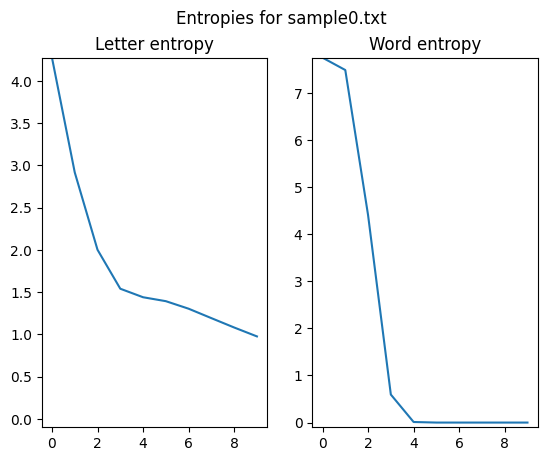

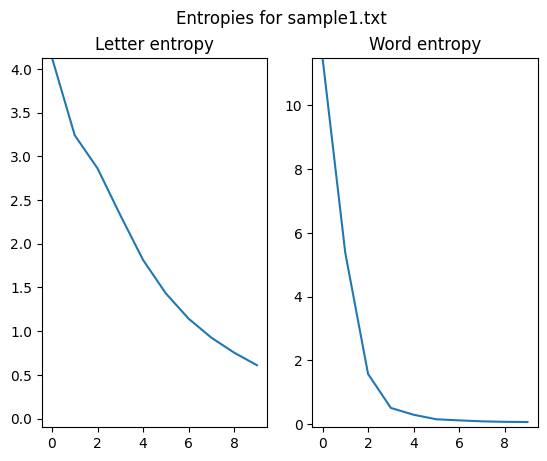

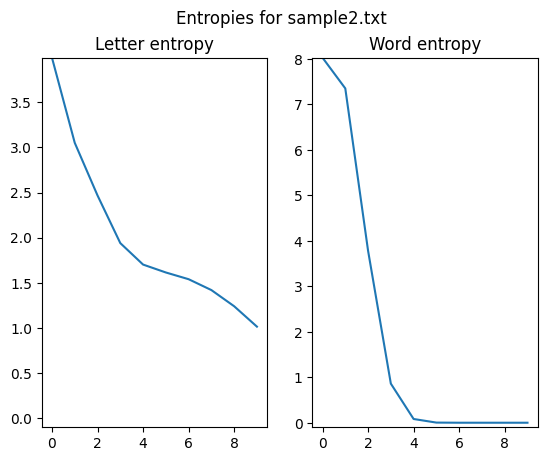

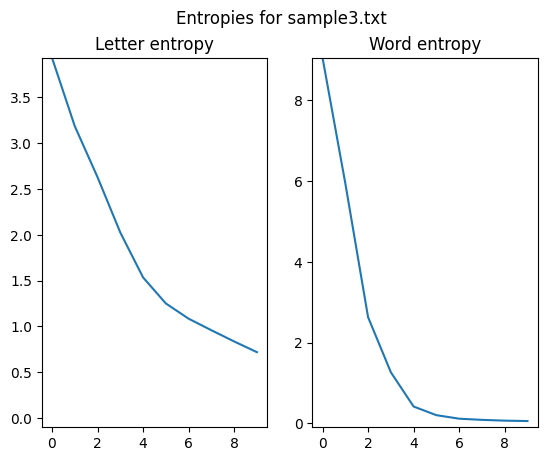

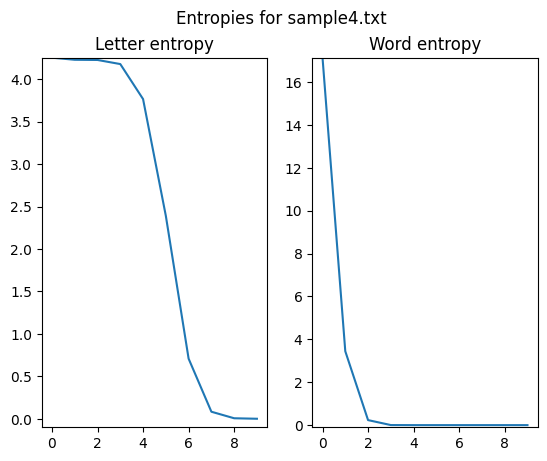

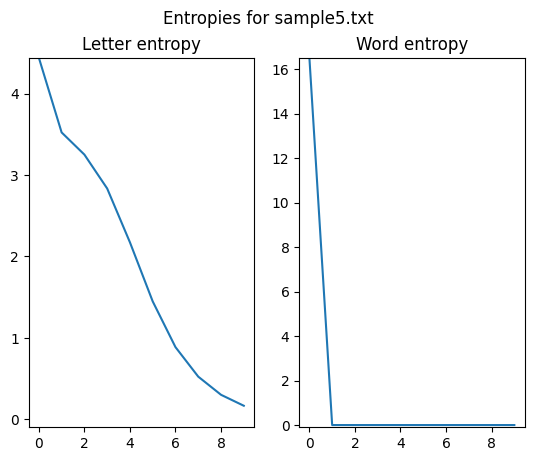

In [6]:
for file in samples:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Entropies for {file}')
    ax1.set_title('Letter entropy')
    ax1.set_ylim(-0.1, max(graphs['c'][file]))
    ax1.plot(graphs['c'][file])

    ax2.set_title('Word entropy')
    ax2.set_ylim(-0.1, max(graphs['w'][file]))
    ax2.plot(graphs['w'][file])
    

**sample0.txt is not a real language:**<br>
Entropy graph of this sample text is very similar to the wiki but it's letter conditional entropy flattens too fast (around rank 3) and stays at around 1.5 Therefore i think it's not a real language although it is close to one.<br>
**sample1.txt is a real language:**<br>
Nearly perfectly reflects the graphs of English and Latin wiki<br>
**sample2.txt is not a real language:**<br>
Entropy graph of this sample text is very similar to the wiki but it's letter conditional entropy flattens too fast (around rank 3) and stays at around 1.5 Therefore i think it's not a real language although it is close to one.<br>
**sample3.txt is a real lanugage:**<br>
Nearly perfectly reflects the graphs of English and Latin wiki<br>
**sample4.txt is not a real language:**<br>
First 3 letters are always random because knowing 2 of them doesnt decrease our certaintity whatsoever<br>
**sample5.txt is not a real language:**<br>
The word entropy for this file plummets so quickly with just the 1st rank and then it doesnt change at all